In [75]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import datetime as dt
sp500filepath=("../project data/indexes/^SP500.Last.txt")


In [92]:
sp500df=pd.read_csv(sp500filepath,delimiter=';',header=None,names=['Date','Open','High','Low','Close','Volume'])
sp500df.drop(labels='Volume',axis=1,inplace=True)
sp500df['Change']=sp500df['Close']-sp500df['Open']
sp500df['Percent_Change']=sp500df['Change']/sp500df['Open']*100
sp500df['Date']=pd.to_datetime(sp500df['Date'],format='%Y%m%d')
sp500df.head()

,Date,Open,High,Low,Close,Change,Percent_Change
0,2020-02-03,3235.66,3268.44,3235.66,3248.92,13.26,0.409808
1,2020-02-04,3280.61,3306.92,3280.61,3297.59,16.98,0.517587
2,2020-02-05,3324.91,3337.58,3313.75,3334.69,9.78,0.294143
3,2020-02-06,3344.92,3347.96,3334.39,3345.78,0.86,0.025711
4,2020-02-07,3335.54,3341.42,3322.12,3327.71,-7.83,-0.234745


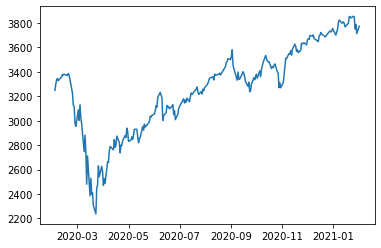

In [94]:
plt.plot(sp500df['Date'],sp500df['Close'])

<AxesSubplot:>

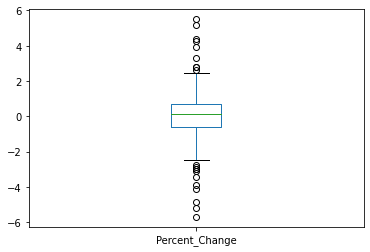

In [101]:
sp500df['Percent_Change'].plot(kind='box')

In [139]:
# Calculate Quantiles/ IQR 

spdfQT=sp500df['Percent_Change'].quantile([.25,.5,.75])
spIQR=spdfQT[.75]-spdfQT[.25]
spUpBd=spdfQT[.75]+spIQR
spLwBd=spdfQT[.25]-spIQR
print(f'Upper Bound is {spUpBd}, and Lower Bound is {spLwBd}')

# Select Outlier Data into a new Dataframe

spOUT=sp500df.loc[(sp500df['Percent_Change'] < spLwBd) | (sp500df['Percent_Change'] > spUpBd)]
print(spOUT.shape)


Upper Bound is 1.9887252389411838, and Lower Bound is -1.9177555348614888
(32, 7)


<BarContainer object of 32 artists>

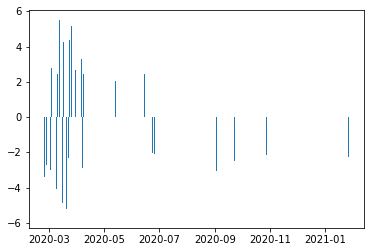

In [88]:
plt.bar(spOUT['Date'],spOUT['Percent_Change'])

In [135]:
sp5df=sp500df.loc[sp500df['Date']>'2020-05']
sp25df=sp500df.loc[sp500df['Date']<'2020-05']

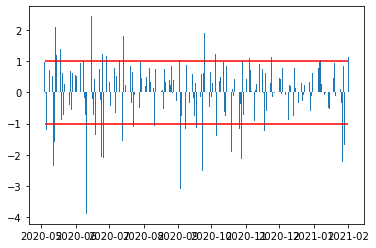

In [137]:
plt.bar(sp5df['Date'],sp5df['Percent_Change'])
plt.hlines(y=(1,-1),xmin=sp5df['Date'].min(),xmax=sp5df['Date'].max(),color='r')

<BarContainer object of 62 artists>

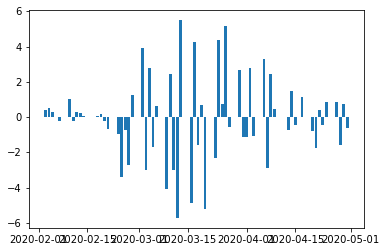

In [138]:
plt.bar(sp25df['Date'],sp25df['Percent_Change'])

In [124]:
# Calculate Quantiles/ IQR after May 

sp5dfQT=sp5df['Percent_Change'].quantile([.25,.5,.75])
sp5IQR=sp5dfQT[.75]-sp5dfQT[.25]
sp5UpBd=sp5dfQT[.75]+sp5IQR
sp5LwBd=sp5dfQT[.25]-sp5IQR
print(f'Upper Bound is {sp5UpBd}, and Lower Bound is {sp5LwBd}')

# Select Outlier Data into a new Dataframe

sp5OUT=sp5df.loc[(sp5df['Percent_Change'] < sp5LwBd) | (sp5df['Percent_Change'] > sp5UpBd)]
print(sp5OUT.shape)

Upper Bound is 1.7013427315795473, and Lower Bound is -1.5010320941174282


In [147]:
sp5Green=sp5OUT.loc[sp5OUT['Percent_Change'] > 0].sort_values(by='Percent_Change',ascending=False)
sp5Red=sp5OUT.loc[sp5OUT['Percent_Change'] < 0].sort_values(by='Percent_Change',ascending=True)
print(f'There are {sp5Green.shape[0]} Really Green Days, and there are {sp5Red.shape[0]} Really Red Days')

There are 4 Really Green Days, and there are 14 Really Red Days


In [148]:
sp5Red

,Date,Open,High,Low,Close,Change,Percent_Change
90,2020-06-11,3123.53,3123.53,2999.49,3002.10,-121.43,-3.887589
149,2020-09-03,3564.74,3564.85,3427.41,3455.06,-109.68,-3.076802
162,2020-09-23,3320.11,3323.35,3232.57,3236.92,-83.19,-2.505640
69,2020-05-12,2939.50,2945.82,2869.59,2870.12,-69.38,-2.360265
248,2021-01-27,3836.83,3836.83,3732.48,3750.77,-86.06,-2.242997
153,2020-09-10,3412.56,3425.55,3329.25,3339.19,-73.37,-2.149999
187,2020-10-28,3342.48,3342.48,3268.89,3271.03,-71.45,-2.137634
101,2020-06-26,3073.20,3073.73,3004.63,3009.05,-64.15,-2.087401
99,2020-06-24,3114.40,3115.01,3032.13,3050.33,-64.07,-2.057218
180,2020-10-19,3493.66,3502.42,3419.93,3426.92,-66.74,-1.910318
